In [ ]:
import pandas as pd
import numpy as np
!pip install mne
import mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 62.3 MB/s eta 0:00:00


In [ ]:
path = "/content/OpenBCI-RAW-2024-02-29_20-35-46.txt"
df = pd.read_csv(path, delimiter = ',', skiprows=5)
data = df.to_numpy()

In [ ]:
sfreq = 250  # sample rate in Hz
data = np.delete(data, [12, 19, 20, 21, 23], axis=1) # IMPORTANT - CHANGE THIS FOR EVERY DATA READING
data = data[:, :-1] # removes timestamps
ch_names = ['Channel {}'.format(i) for i in range(data.shape[1])]
ch_types = ['eeg' for i in range(data.shape[1])]

In [ ]:
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
raw = mne.io.RawArray(data.T, info)

Creating RawArray with float64 data, n_channels=19, n_times=170695
    Range : 0 ... 170694 =      0.000 ...   682.776 secs
Ready.


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
<Info | 7 non-empty values
 bads: []
 ch_names: Channel 1, Channel 2, Channel 3, Channel 4, Channel 5, Channel ...
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 250.0 Hz
>
[[ 10884.53959042  10881.09742178  10883.64552064 ...  32288.77124653
   32286.0443337   32284.90439473]
 [-30005.13821902 -30003.08185853 -30002.85834108 ...  -9061.06192601
   -9072.32720522  -9081.267903  ]
 [ -8141.73467657  -8157.02326978  -8165.3828222  ...  19543.40422671
   19549.21568027  19545.88527034]
 ...
 [ 34449.78260395  34449.91671442  34462.79131923 ...  46822.1437123
   46824.08831407  46825.63058443]
 [ 33117.77509663  33119.56323618  33122.31250075 ...  38398.59824164
   38400.22991898  38400.09580852]
 [ 37625.04906953  37619.9081683   37638.23659876 ...  46539.03651703
   46541.04817403  46539.93058681]]
NOTE: plot_psd() is a legacy f

<ipython-input-5-d14946919b75>:13: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd(fmin = 0, fmax = 15)
<ipython-input-5-d14946919b75>:13: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmin = 0, fmax = 15)


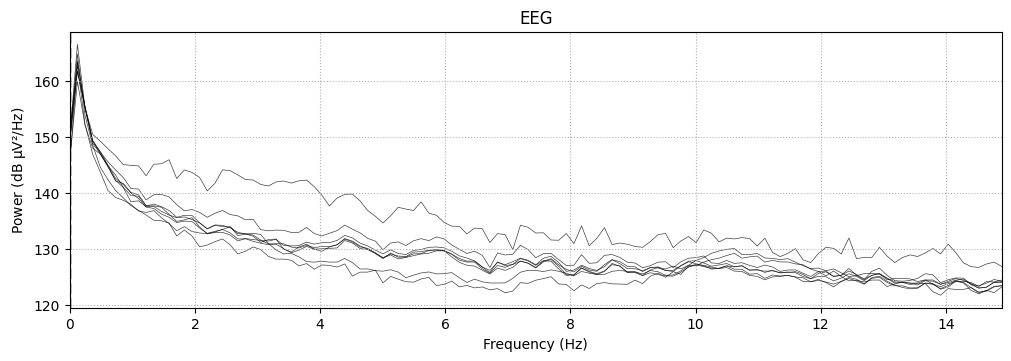

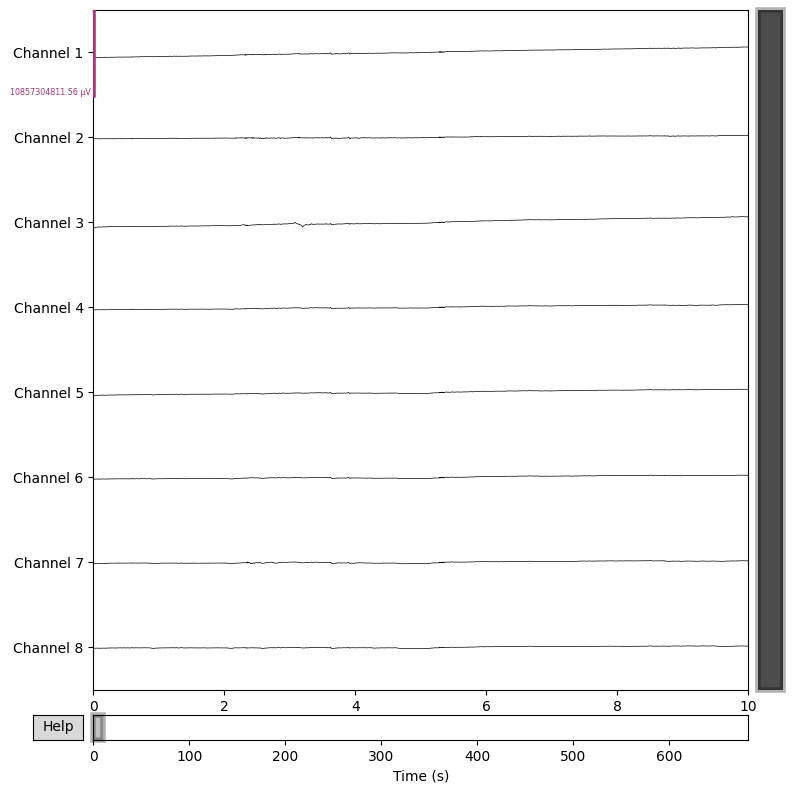

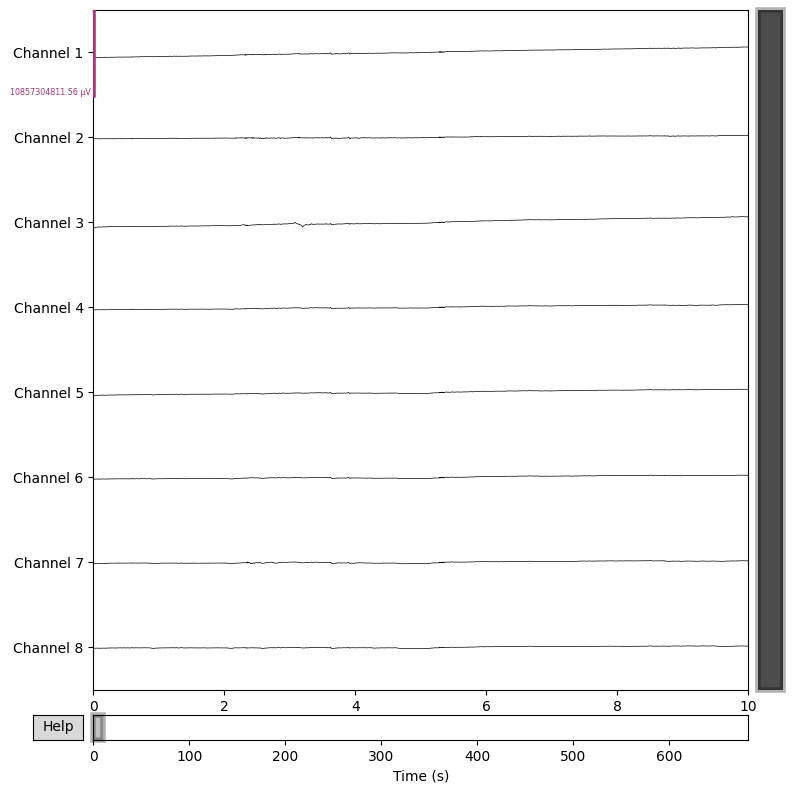

In [ ]:
ch_names = [raw.ch_names]
ch_names_to_keep = [ch_names[0][1:9]]
raw = raw.pick_channels(ch_names_to_keep[0])
# Now you can work with the MNE Raw object
print(raw.info)
print(raw.get_data())
#bad_channels = ['Channel 3']  # List of channel names to mark as bad
#raw.info['bads'] = bad_channels

# Remove bad channels from further analysis
# raw.apply_function(lambda x: x*1e-9, picks="eeg")
#raw.pick_types(eeg=True, exclude='bads')
raw.plot_psd(fmin = 0, fmax = 15)
raw.plot(scalings='auto')

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge

<ipython-input-6-a3097485cbf2>:10: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd()
<ipython-input-6-a3097485cbf2>:10: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


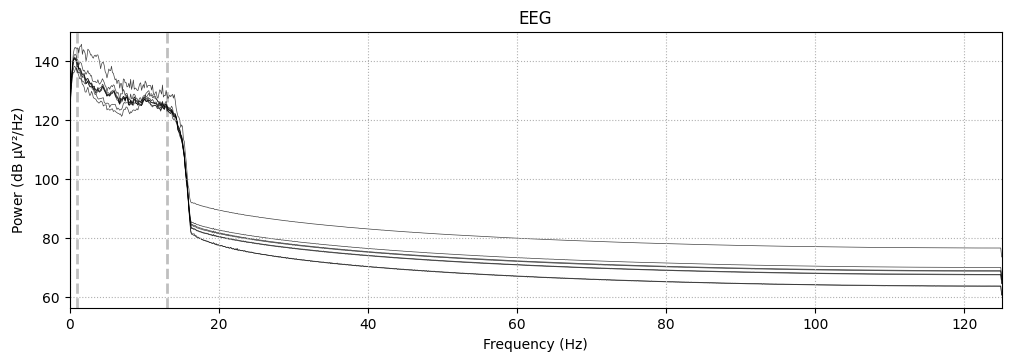

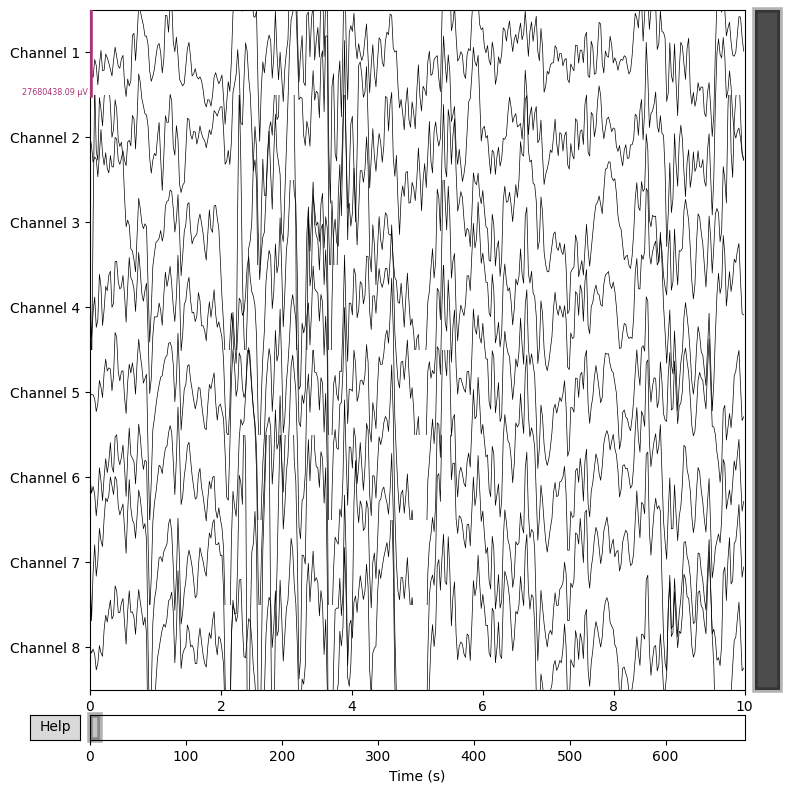

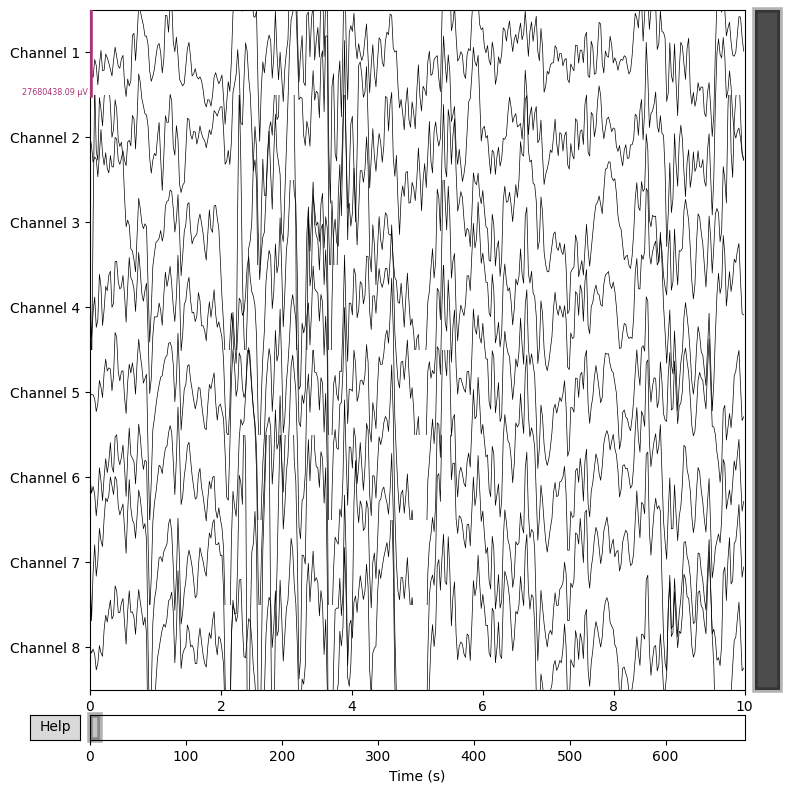

In [ ]:
# Time to start filtering
# 60hz electrical filter
raw.notch_filter(60)


# Research said filter to alpha/beta waves
raw.filter(l_freq=1, h_freq=13)

# raw.apply_function(lambda x: x*1e-, picks="eeg")
raw.plot_psd()

#raw.crop(0, 10)
raw.plot(scalings="auto")

In [ ]:
filteredData = raw._data
num_samples = len(filteredData[0])
filteredData = np.append(filteredData, np.zeros([1, num_samples]), 0)

list_of_times = [[139, 198], [229, 258], [229, 258], [289, 319], [349, 378]]
for interval in list_of_times:
  interval[0] = interval[0] * sfreq - offset
  interval[1] = interval[1] * sfreq - offset

for interval in list_of_times:
  for i in range(interval[0], interval[1]):
    if i >= cutoff:
      break
    filteredData[8, i] = 1

NameError: name 'offset' is not defined